# Computer Science Group 3

Members:
1.	Arya Pradeep Menon (K2275592)
2.	Gudikota Dharani Kumar Gupta (K2203537)
3.	Alan Jose Tom (K2211586)
4.	Alan Vinodh (K2172630)


# Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

from keras.models import Sequential, load_model
from keras.layers import RandomFlip, RandomRotation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Load Data

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/bloodmnist.npz'

In [ ]:
dataLoad = np.load(path)

In [ ]:
with dataLoad as data:
  x_train = data['train_images']
  y_train = data['train_labels']
  x_val = data['val_images']
  y_val = data['val_labels']
  x_test = data['test_images']
  y_test = data['test_labels']

# Verify no records are missing
assert not np.any(np.isnan(x_train))
assert not np.any(np.isnan(y_train))
assert not np.any(np.isnan(x_test))
assert not np.any(np.isnan(y_test))

# Plot Samples

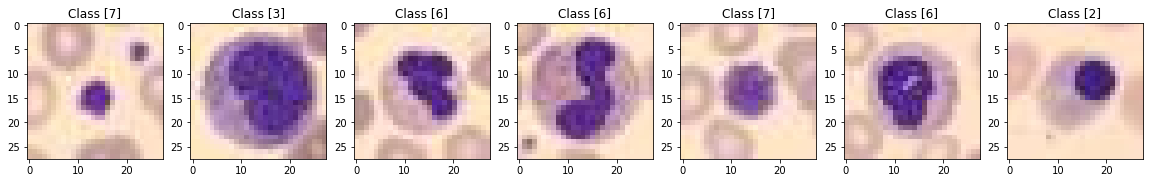

In [ ]:
fig, ax = plt.subplots(1, 7, figsize=(20, 5))
for i in range(7):
    ax[i].imshow(x_train[i], interpolation = 'none')
    ax[i].set_title('Class {}'.format(y_train[i]))
plt.show()

# Data Preprocessing

In [ ]:
np.random.seed(0)

In [ ]:
# Printing number of samples in each class

counts = np.bincount(y_train[:, 0])
print(counts)

[ 852 2181 1085 2026  849  993 2330 1643]


In [ ]:
# Calculating weights for dealing class imbalance problem

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]
weight_for_2 = 1.0 / counts[2]
weight_for_3 = 1.0 / counts[3]
weight_for_4 = 1.0 / counts[4]
weight_for_5 = 1.0 / counts[5]
weight_for_6 = 1.0 / counts[6]
weight_for_7 = 1.0 / counts[7]

class_weight = {0: weight_for_0, 1: weight_for_1, 
                2: weight_for_2, 3: weight_for_3, 
                4: weight_for_4, 5: weight_for_5, 
                6: weight_for_6, 7: weight_for_7}

In [ ]:
# Data Normalization

x_train = x_train.astype('float32') /255
x_val = x_val.astype('float32') /255
x_test = x_test.astype('float32') /255


print("X_Train shape", x_train.shape)
print("X_Validation shape", x_val.shape)
print("X_Test shape", x_test.shape)
print("Y_Train shape", y_train.shape)
print("Y_Validation shape", y_val.shape)
print("Y_Test shape", y_test.shape)

X_Train shape (11959, 28, 28, 3)
X_Validation shape (1712, 28, 28, 3)
X_Test shape (3421, 28, 28, 3)
Y_Train shape (11959, 1)
Y_Validation shape (1712, 1)
Y_Test shape (3421, 1)


In [ ]:
# One-hot Encoder

y_train = np_utils.to_categorical(y_train, num_classes = 8)
y_val = np_utils.to_categorical(y_val, num_classes = 8)
y_test = np_utils.to_categorical(y_test, num_classes = 8)

print(y_test.shape)

(3421, 8)


# Build Model

In [ ]:
model = Sequential()

model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(28,28,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(8, activation="softmax"))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [ ]:
# Compiling Model

model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [ ]:
# Defining callbacks for reducing overfitting

callbacks = [EarlyStopping(monitor="val_loss", patience=5),
ModelCheckpoint(filepath="/content/drive/MyDrive/Colab Notebooks/Models/BloodMNIST/best_model.h5",
monitor="val_loss",
save_best_only=True)]

# Train Model

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=50, callbacks = callbacks, verbose=1, validation_data=(x_val, y_val))

Epoch 1/50
374/374 [==============================] - 22s 53ms/step - loss: 1.3082 - accuracy: 0.5004 - val_loss: 0.7273 - val_accuracy: 0.7418
Epoch 2/50
374/374 [==============================] - 11s 30ms/step - loss: 0.7409 - accuracy: 0.7312 - val_loss: 0.5479 - val_accuracy: 0.7950
Epoch 3/50
374/374 [==============================] - 11s 28ms/step - loss: 0.6077 - accuracy: 0.7777 - val_loss: 0.4580 - val_accuracy: 0.8341
Epoch 4/50
374/374 [==============================] - 11s 28ms/step - loss: 0.5278 - accuracy: 0.8117 - val_loss: 0.4214 - val_accuracy: 0.8499
Epoch 5/50
374/374 [==============================] - 11s 30ms/step - loss: 0.4648 - accuracy: 0.8371 - val_loss: 0.3688 - val_accuracy: 0.8639
Epoch 6/50
374/374 [==============================] - 11s 30ms/step - loss: 0.4426 - accuracy: 0.8430 - val_loss: 0.3514 - val_accuracy: 0.8750
Epoch 7/50
374/374 [==============================] - 11s 30ms/step - loss: 0.4094 - accuracy: 0.8562 - val_loss: 0.3902 - val_accuracy:

# Model Evaluation

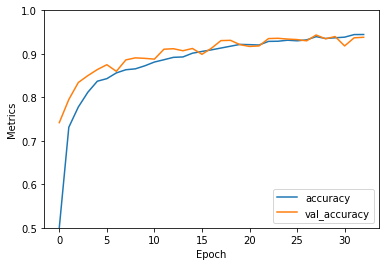

In [ ]:
# Plotting training and validation results

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
model = load_model("/content/drive/MyDrive/Colab Notebooks/Models/BloodMNIST/best_model.h5")
model.save("/content/drive/MyDrive/Colab Notebooks/Models/BloodMNIST/blood_1.h5")

In [ ]:
# Model evaluation based on validation set

score = model.evaluate(x_val, y_val, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.17206794023513794
Test accuracy: 0.9433411359786987


In [ ]:
# Making predictions on test set

y_pred = np.argmax(model.predict(x_test), axis=-1)
y_test = np.argmax(y_test, axis=-1)

107/107 [==============================] - 1s 8ms/step


In [ ]:
# Metrics evaluation

print(classification_report(y_test, y_pred))

print("\nConfusion Matrix\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       244
           1       0.98      0.99      0.98       624
           2       0.97      0.90      0.93       311
           3       0.84      0.82      0.83       579
           4       0.96      0.88      0.92       243
           5       0.88      0.85      0.86       284
           6       0.97      0.97      0.97       666
           7       0.99      1.00      1.00       470

    accuracy                           0.93      3421
   macro avg       0.92      0.92      0.92      3421
weighted avg       0.93      0.93      0.93      3421


Confusion Matrix

[[230   2   0   8   0   3   1   0]
 [  2 619   0   1   0   0   2   0]
 [  2   2 279  19   1   0   5   3]
 [ 53   5   3 472   5  26  15   0]
 [  4   0   4  17 215   3   0   0]
 [  5   0   1  35   2 241   0   0]
 [  1   6   1  12   0   1 645   0]
 [  0   0   0   0   0   0   0 470]]


# Dealing Class Imbalance Problem

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, 
                    epochs=50, callbacks = callbacks, class_weight = class_weight,
                    verbose=1, validation_data=(x_val, y_val))

Epoch 1/50
374/374 [==============================] - 11s 27ms/step - loss: 4.7858e-04 - accuracy: 0.8282 - val_loss: 0.3445 - val_accuracy: 0.8820
Epoch 2/50
374/374 [==============================] - 11s 30ms/step - loss: 2.3892e-04 - accuracy: 0.8954 - val_loss: 0.2322 - val_accuracy: 0.9182
Epoch 3/50
374/374 [==============================] - 11s 29ms/step - loss: 1.6161e-04 - accuracy: 0.9239 - val_loss: 0.1923 - val_accuracy: 0.9369
Epoch 4/50
374/374 [==============================] - 11s 30ms/step - loss: 1.2896e-04 - accuracy: 0.9368 - val_loss: 0.1776 - val_accuracy: 0.9445
Epoch 5/50
374/374 [==============================] - 12s 31ms/step - loss: 1.1527e-04 - accuracy: 0.9461 - val_loss: 0.1718 - val_accuracy: 0.9422
Epoch 6/50
374/374 [==============================] - 11s 30ms/step - loss: 1.0713e-04 - accuracy: 0.9478 - val_loss: 0.1701 - val_accuracy: 0.9398
Epoch 7/50
374/374 [==============================] - 11s 29ms/step - loss: 1.0635e-04 - accuracy: 0.9492 - val_

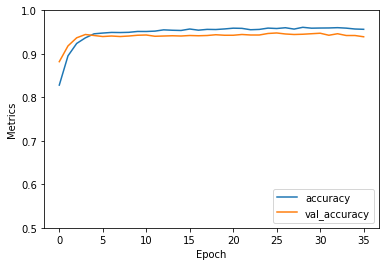

In [ ]:
# Plotting training and validation results

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Model Evaluation

In [ ]:
model = load_model("/content/drive/MyDrive/Colab Notebooks/Models/BloodMNIST/best_model.h5")
model.save("/content/drive/MyDrive/Colab Notebooks/Models/BloodMNIST/blood_2.h5")

In [ ]:
# Model evaluation based on validation set

score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1550816148519516
Test accuracy: 0.947429895401001


In [ ]:
# Making predictions on test set

y_pred = np.argmax(model.predict(x_test), axis=-1)

107/107 [==============================] - 1s 7ms/step


In [ ]:
# Metrics evaluation

print(classification_report(y_test, y_pred))

print("\nConfusion Matrix\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       244
           1       0.99      0.99      0.99       624
           2       0.94      0.94      0.94       311
           3       0.87      0.84      0.86       579
           4       0.92      0.93      0.93       243
           5       0.88      0.89      0.88       284
           6       0.97      0.97      0.97       666
           7       0.99      1.00      1.00       470

    accuracy                           0.94      3421
   macro avg       0.93      0.93      0.93      3421
weighted avg       0.94      0.94      0.94      3421


Confusion Matrix

[[219   2   0  12   2   8   1   0]
 [  1 618   0   2   0   0   3   0]
 [  1   0 291  12   2   0   2   3]
 [ 23   5  11 489   9  27  15   0]
 [  1   0   4  11 226   1   0   0]
 [  1   0   1  24   6 252   0   0]
 [  1   2   3  11   0   0 649   0]
 [  0   0   1   0   0   0   0 469]]


# Image Augmentation

In [ ]:
augmentation = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True)
augmentation.fit(x_train)

In [ ]:
history = model.fit(augmentation.flow(x_train, y_train, batch_size=32, seed = 42), class_weight = class_weight, epochs=50, callbacks = callbacks, verbose=1, validation_data=(x_val, y_val))

Epoch 1/50
374/374 [==============================] - 15s 39ms/step - loss: 3.1839e-04 - accuracy: 0.8517 - val_loss: 0.2813 - val_accuracy: 0.8995
Epoch 2/50
374/374 [==============================] - 14s 38ms/step - loss: 2.7932e-04 - accuracy: 0.8637 - val_loss: 0.2601 - val_accuracy: 0.9077
Epoch 3/50
374/374 [==============================] - 14s 39ms/step - loss: 2.7936e-04 - accuracy: 0.8640 - val_loss: 0.3255 - val_accuracy: 0.8797
Epoch 4/50
374/374 [==============================] - 15s 39ms/step - loss: 2.5781e-04 - accuracy: 0.8737 - val_loss: 0.2358 - val_accuracy: 0.9118
Epoch 5/50
374/374 [==============================] - 14s 39ms/step - loss: 2.6419e-04 - accuracy: 0.8647 - val_loss: 0.2626 - val_accuracy: 0.8995
Epoch 6/50
374/374 [==============================] - 14s 38ms/step - loss: 2.6040e-04 - accuracy: 0.8750 - val_loss: 0.2556 - val_accuracy: 0.9077
Epoch 7/50
374/374 [==============================] - 15s 40ms/step - loss: 2.5775e-04 - accuracy: 0.8724 - val_

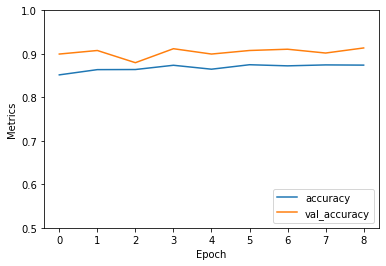

In [ ]:
# Plotting training and validation results

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Reference

Liang, X. (2023) MNIST_in_Keras.ipynb. Available at: https://kingston.app.box.com/s/5k5eqgwzlp5mf2w7y3jh0lkzqmm0j76u (Accessed: Mar 5, 2023).